<a href="https://colab.research.google.com/github/alexdaniel-23/Predicciones_de_ventas/blob/main/Prediccion_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importamos las librerias que usaremos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
prediccion_de_ventas =("/content/drive/MyDrive/Proyecto Prediccion de Ventas/sales_predictions.csv")
df =pd.read_csv(prediccion_de_ventas)

### Realizo una visualizacion general de nuestro Dataframe para observa la cantidad de filas y columnas que tenemos

In [3]:
df.shape

(8523, 12)

### Usamos df.head() para conocer la cabecera  y ver como esta organizado nuestro Dataframe

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Buscamos informacion si existen o no datos duplicados dentro del dataframe

In [6]:
df.duplicated().sum()

0

Usamos el metod df.info() para observar el tipo de dato que se registra en cada columna y si existen valores nulos dentro del dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Observamos que si existen valores nulos en la Columna Item-weight y la columna Outlet_Size por lo cual buscaremos la cantidad de valores nulos y veremos si estas columnas son relevantes para nuestro analisis de prediccion

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### observamos que existen 1463 valores nulos en la Columna Item_Weight y 2410 valores nulos en Outlet_Size

Analizaremos cada columna para poder llenar esos valores nulos y darle tratamiento al dataframe

Primero volveremos a traer la cabecera del dataframe para ver si podemos encontar alguna ralcion de otras columnas para llenar los faltantes en las que tenemos

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


###Realizamos un describe para conocer las caracteristicas de los valores numericos

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [10]:
df['Item_Weight'].isnull().sum()

1463

### Observamos que la columna Item_Weight tiene 1463 valores nulos por lo cual lo rellenaremos por los valores promedios de esa columna ya que no observsmos un valor outlier o atipico dentro de esta coolumna en la decripcion previa

In [16]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

Comprobamos que no se hayan guardado los cambios

In [ ]:
df.isnull().sum()

### Ahora analizaremos la columna "Outlet_Size", para verificar que tratamiento le daremos a esta columna

Verificaremos cuales son los valores unicos presentes en la columna Outlet_Size

In [8]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [9]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

En el analisis previoa obervamos que los valores unicos presentes ene la columna Outlet_size son el Medium, Small, High y el NAN

Realizamos un df.head() para tratar de ver alguna relacion y poder llenar los valores nulos en el dataframe, especificamente en la columna Outlet_Size

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Procederemos a conocer la cantidad de valores nulos presentes en Outlet_Size

In [22]:
df['Outlet_Size'].isnull().sum()

2410

#### Observamos que la cantidad de nulos de demasiadad y no tenemos la informacion relevantes para conocer el tratamiento de nulos en esta columna es por ello que no la consideraremos para nuestro analisis y procederemos a eliminarla

In [23]:
df.drop(columns="Outlet_Size", inplace =True)

Verificamos si se guaradaron los cambios mediante un df.info()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


Observamos que se guardaron los cambios y ahora procederemos a conocer si existen aun valores nulos en nuestro dataframe mediante un df.isnull().sum()

In [25]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Ahora procederemos a realizar los graficos quennos den una mejor idea de nuestrso datos

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


## Analizaremos el porcentaje del nivel de preferencia del tipo de alimento

In [29]:
alimentos =df['Item_Type'].value_counts()
alimentos

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Realizamos un pequeño filtro quennos indique, los tipos de alimentos presentes en la columna "Item_type"

In [31]:
clase_alimentos = alimentos.index
clase_alimentos

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object')

Verificamos la cantidad de valores presentes por cada alimento en la columna "Item_type"

In [33]:
cantidad_alimentos = alimentos.values
cantidad_alimentos

array([1232, 1200,  910,  856,  682,  649,  648,  520,  445,  425,  251,
        214,  169,  148,  110,   64])

Ahora, realizamos el grafico correspondiente

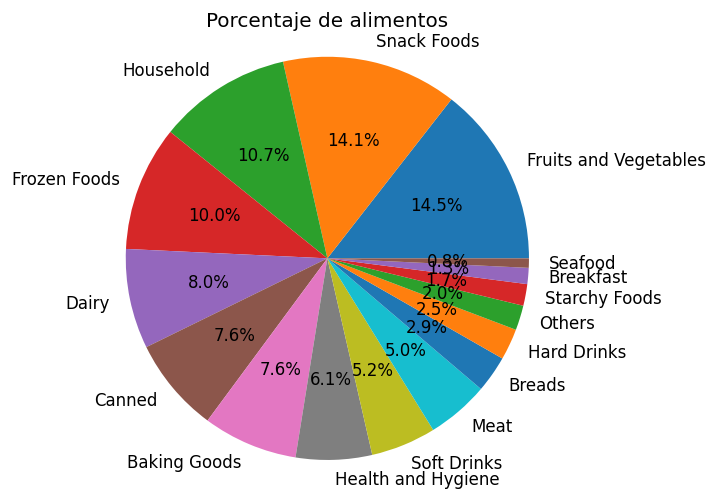

In [49]:
plt.figure(dpi=120)
plt.pie(cantidad_alimentos, labels=clase_alimentos, autopct='%0.1f%%')
plt.axis('equal')
plt.title("Porcentaje de alimentos")
plt.show()

### observamos que el tipo de alimento que tiene mayor presencia en los datos registrados es el de Fruits and Vegetables con un porcentaje del 14.5% en referencia a los demas

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


Realizamos un agrupamiento para conocer en que año existieron mayor cantida de tiendas por año

In [56]:
tiendas_año= df.groupby('Outlet_Establishment_Year')[['Outlet_Type']].count().reset_index()
tiendas_año

,Outlet_Establishment_Year,Outlet_Type
0,1985,1463
1,1987,932
2,1997,930
3,1998,555
4,1999,930
5,2002,929
6,2004,930
7,2007,926
8,2009,928


Realizaremos el codigo pra la grafica correspondiente

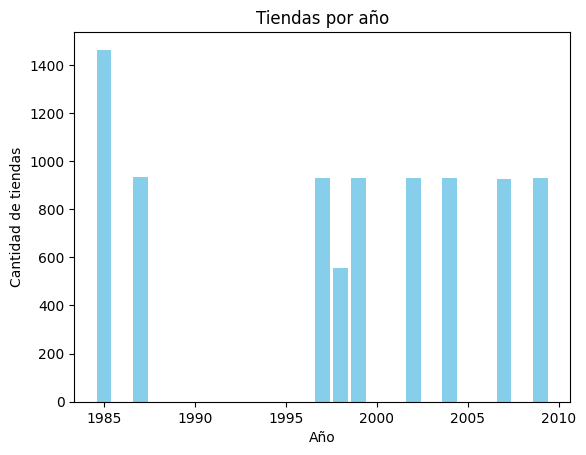

In [57]:
plt.bar(tiendas_año['Outlet_Establishment_Year'], tiendas_año['Outlet_Type'], color="skyblue")
plt.title("Tiendas por año")
plt.ylabel("Cantidad de tiendas")
plt.xlabel("Año")
plt.show()

Observamos que el año donde hubo mas tiendas existentes fue el de 1985, con tindas por encima de 1400, desde lo cual observamos una disminucion y reduccion de las tiendas